### Link to your presentation video here

Team Members: Navya sri Kalli, Kuldeep Prasad, Hemani Shah, Rohit Raj

**Steps implemented**


*   Importing necessary libraries
*   Visualizing the data

*   Data preprocessing
*   Hypothesis testing

*   Removing columns that are highly correlated
*   Implementing linear regression

*   Preprocessing players_20 dataset
*   preparing the test data

*   Predicting and computing the results
*   The best player












# Your code here

## **Importing necessary libraries**

In [42]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

## **Visualising the data**

In [43]:
#Reading the data
df=pd.read_csv("https://raw.githubusercontent.com/rraj29/data/main/players_19.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [44]:
df.shape

(17770, 104)

In [45]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,...,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,213797.776308,25.193922,181.253292,75.310917,66.240405,71.382949,2.440756e+06,9956.162071,1.117783,2.946427,...,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117
std,29955.746535,4.651957,6.745892,7.080013,6.994104,6.145171,5.644779e+06,22330.640048,0.401085,0.659353,...,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458
min,164.000000,16.000000,154.000000,50.000000,47.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,...,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000
25%,199803.000000,21.000000,176.000000,70.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,50.000000,57.000000,37.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,57.000000
50%,221350.500000,25.000000,181.000000,75.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,...,58.000000,64.000000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,40.000000,63.000000
75%,235967.750000,28.000000,186.000000,80.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,...,64.000000,69.000000,65.000000,72.000000,71.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,246063.000000,45.000000,205.000000,110.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,91.000000,89.000000,91.000000,92.000000,91.000000,94.000000,65.000000,90.000000


In [46]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   17770 non-null  int64  
 1    player_url                  17770 non-null  object 
 2    short_name                  17770 non-null  object 
 3    long_name                   17770 non-null  object 
 4    age                         17770 non-null  int64  
 5    dob                         17770 non-null  object 
 6    height_cm                   17770 non-null  int64  
 7    weight_kg                   17770 non-null  int64  
 8    nationality                 17770 non-null  object 
 9    club                        17770 non-null  object 
 10   overall                     17770 non-null  int64  
 11   potential                   17770 non-null  int64  
 12   value_eur                   17770 non-null  int64  
 13   wage_eur      

**Observations in this section**

Initially, dataset has 17770 rows and 104 columns of which 16 columns are float type, 11 are int type, and 77 are object type. Redundant columns and columns with null values are observed.

## **Data Preprocessing**

Removing the obvious column and rows which should not make a big difference to the model

In [47]:
#Remove the last 31 columns 
df = df.iloc[: , :-31]

# Remove the columns suggested in the project description
df.drop(["sofifa_id", "player_url", "short_name","long_name", "real_face", "potential"],axis=1,inplace=True)

# Remove the columns that should not make a difference
df.drop(["dob", "nationality", "club", "player_positions", "body_type", "loaned_from", "joined", "contract_valid_until"],axis=1,inplace=True)

# Removing the columns for team_jersey_number and nation_jersey_number. These should not make a difference
df.drop(["player_tags", "team_jersey_number", "nation_jersey_number"],axis=1,inplace=True)

In [48]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         17770 non-null  int64  
 1   height_cm                   17770 non-null  int64  
 2   weight_kg                   17770 non-null  int64  
 3   overall                     17770 non-null  int64  
 4   value_eur                   17770 non-null  int64  
 5   wage_eur                    17770 non-null  int64  
 6   preferred_foot              17770 non-null  object 
 7   international_reputation    17770 non-null  int64  
 8   weak_foot                   17770 non-null  int64  
 9   skill_moves                 17770 non-null  int64  
 10  work_rate                   17770 non-null  object 
 11  release_clause_eur          16257 non-null  float64
 12  team_position               17547 non-null  object 
 13  nation_position             110

In [49]:
#dropping rows of players who do not have a team position
na = pd.notnull(df["team_position"])
df = df[na]

In [50]:
df.shape

(17547, 56)

Replacing missing values in certain columns with "0" to indicate that player has not used that skill anytime

In [51]:
#filling missing values with "0"
for i in df.columns[14:26]:
    print("filling missing values in :"+i)
    df[i]=df[i].fillna(0)
df["release_clause_eur"].fillna(0.0, inplace=True)

filling missing values in :pace
filling missing values in :shooting
filling missing values in :passing
filling missing values in :dribbling
filling missing values in :defending
filling missing values in :physic
filling missing values in :gk_diving
filling missing values in :gk_handling
filling missing values in :gk_kicking
filling missing values in :gk_reflexes
filling missing values in :gk_speed
filling missing values in :gk_positioning


Certain columns have values in the form of "a+b" or "a-b". Replacing those values with results obtained after evaluating the expressions

In [52]:
#replacing values with accurate data in columns which contain expressions
for i in df.columns[27:]:
    print("evaluating values in column :"+i)
    df[i]=df[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

evaluating values in column :attacking_crossing
evaluating values in column :attacking_finishing
evaluating values in column :attacking_heading_accuracy
evaluating values in column :attacking_short_passing
evaluating values in column :attacking_volleys
evaluating values in column :skill_dribbling
evaluating values in column :skill_curve
evaluating values in column :skill_fk_accuracy
evaluating values in column :skill_long_passing
evaluating values in column :skill_ball_control
evaluating values in column :movement_acceleration
evaluating values in column :movement_sprint_speed
evaluating values in column :movement_agility
evaluating values in column :movement_reactions
evaluating values in column :movement_balance
evaluating values in column :power_shot_power
evaluating values in column :power_jumping
evaluating values in column :power_stamina
evaluating values in column :power_strength
evaluating values in column :power_long_shots
evaluating values in column :mentality_aggression
eval

In [53]:
#label encoding preferred foot column
df["preferred_foot"] = df["preferred_foot"].map({"Left":0, 'Right':1})
#replacing nation position with 0/1 to indicate whether a player has palyed for the nation or not. 
#Rank of the player depends on this type of metric too.
df["nation_position"]= df["nation_position"].apply(lambda x:0 if x == np.nan else 1)

In [54]:
#Encoding team position column
df["team_position"].replace('RES', 'GK', inplace=True)
df["team_position"].replace('SUB', 'GK', inplace=True)
df_encoded_team=pd.get_dummies(df["team_position"],prefix="team",drop_first=False)
df=pd.concat([df,df_encoded_team],axis=1)
df.drop(["team_position"],axis=1,inplace=True)

In [55]:
#Encoding work rate column
df["work_rate_att"]=df["work_rate"].apply(lambda x: x.split("/")[0])
df["work_rate_def"]=df["work_rate"].apply(lambda x: x.split("/")[1])
df_att=pd.get_dummies(df["work_rate_att"],prefix="work_rate_att",drop_first=False)
df_def=pd.get_dummies(df["work_rate_def"],prefix="work_rate_def",drop_first=False)
df=pd.concat([df,df_att,df_def],axis=1)
df.drop(["work_rate", "work_rate_att", "work_rate_def"],axis=1,inplace=True)

In [56]:
#Replacing players traits column with the count of number of traits a player has
#This helps the model to learn something out of this predictor instead of removing it completely.
df["player_traits"].fillna('', inplace=True)
for i in range(df.shape[0]):
    a=df["player_traits"].iloc[i]
    b=len(a.split(','))
    if a=='':
        b=0
    df["player_traits"].iloc[i]=b

/usr/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
df.shape

(17547, 87)

In [58]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17547 entries, 0 to 17769
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         17547 non-null  int64  
 1   height_cm                   17547 non-null  int64  
 2   weight_kg                   17547 non-null  int64  
 3   overall                     17547 non-null  int64  
 4   value_eur                   17547 non-null  int64  
 5   wage_eur                    17547 non-null  int64  
 6   preferred_foot              17547 non-null  int64  
 7   international_reputation    17547 non-null  int64  
 8   weak_foot                   17547 non-null  int64  
 9   skill_moves                 17547 non-null  int64  
 10  release_clause_eur          17547 non-null  float64
 11  nation_position             17547 non-null  int64  
 12  pace                        17547 non-null  float64
 13  shooting                    175

**Observation in this section**

Varius techniques are used to drop rows, drop columns, to replace missing values in each column, and to trannsform all the data into a similar fashion. Each column has different properties and appropriate techniques are applied on the data to gain as much information as possible for the model to learn. After this step, dataset has 17547 rows and 87 columns with out null values. 

## **Hypothesis Testing to remove insignificant columns**

In [59]:
# Get all the columns except 'sales' as the predictors
X = df.drop(['overall'],axis=1)

# Select 'sales' as the response variable
y = df['overall']


In [60]:
# Initialize a linear regression model with normalize=True
lreg = LinearRegression(normalize=True)

# Fit the model on the entire data
lreg.fit(X, y)

/usr/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [61]:
#storing the values in two lists
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors,coefficients = list(zip(*sorted(coef_dict.items(),key=lambda x: x[1])))

In [62]:
# Helper function to compute the t-statistic 
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)

In [63]:
# Initialize an empty list to store the coefficient values
coef_dist = []

# Set the number of bootstraps
numboot = 1000

# Loop over the all the bootstraps
for i in range(numboot):

    # Get a bootstrapped version of the dataframe
    df_new = df.sample(frac=1,replace=True)

    # Get all the columns except 'sales' as the predictors
    X = df_new.drop("overall",axis=1)

    # Select 'sales' as the response variable
    y = df_new["overall"]

    # Initialize a linear regression model with normalize=True
    lreg = LinearRegression(normalize=True)

    # Fit the model on the entire data
    lreg.fit(X, y)

    # Append the coefficients of all predictors to the list
    coef_dist.append(lreg.coef_)

# Convert the list to a numpy array
coef_dist = np.array(coef_dist)


/usr/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Stand

In [64]:
# Use the helper function get_t to find the T-test values
tt = get_t(coef_dist)
n = df.shape[0]

In [65]:
# Get the t-value associated with each predictor
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))


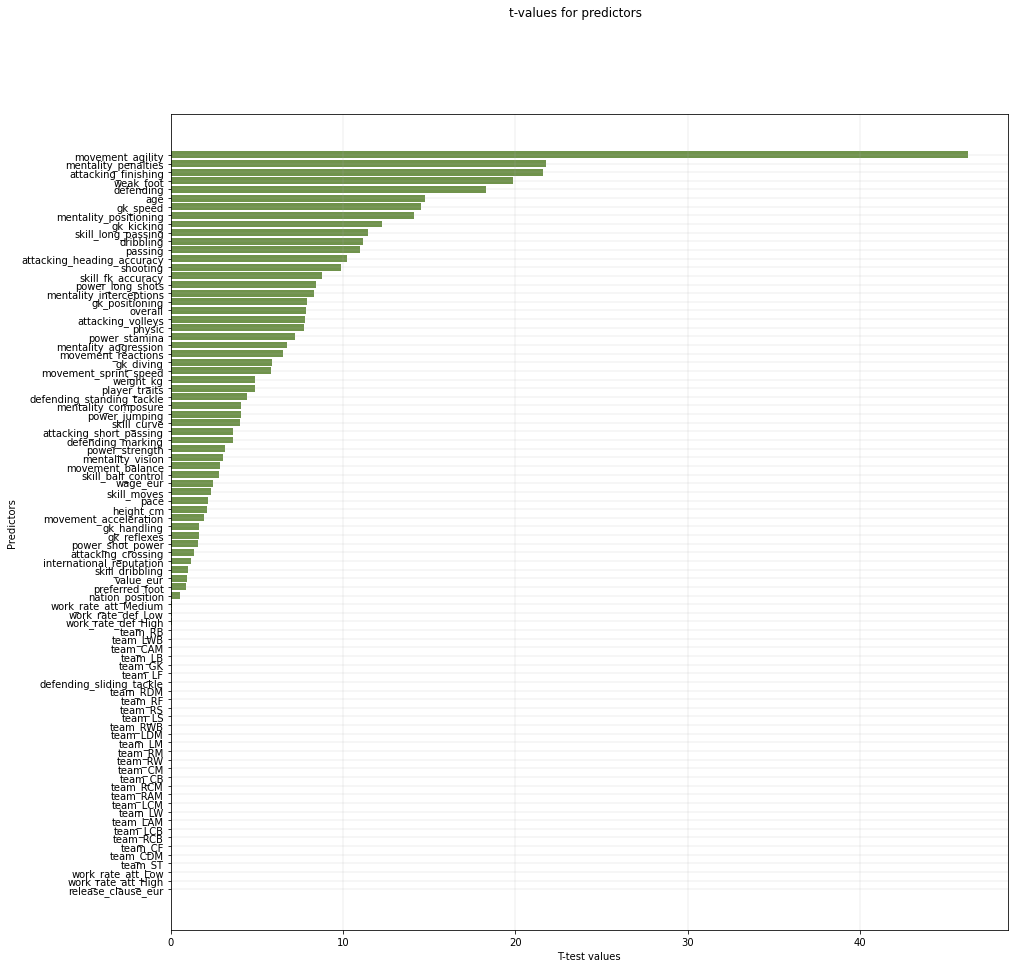

In [66]:
# Helper code below to visualise the t-values
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(predictors,tvalues, align='center',color="#336600",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
fig.suptitle("t-values for predictors")
plt.show();

In [67]:
#dropping columns which have tvalue less than 5
count=0
to_drop = []
for i in range(len(tvalues)):
    if tvalues[i]<3:
        print(f"{predictors[i]} : {tvalues[i]}")
        to_drop.append(predictors[i])
        count+=1
    
print("total :"+ str(count) + " are being removed")
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

release_clause_eur : 0.01253340366554719
work_rate_att_High : 0.015121842347484293
work_rate_att_Low : 0.015121842347796477
team_ST : 0.015121842347802705
team_CDM : 0.025003944034007186
team_CF : 0.02500394403406635
team_RCB : 0.025003944034125074
team_LCB : 0.025003944034172613
team_LAM : 0.025003944034190165
team_LW : 0.025003944034196156
team_LCM : 0.02500394403423735
team_RAM : 0.0250039440342485
team_RCM : 0.025003944034257274
team_CB : 0.025003944034260806
team_CM : 0.025003944034289398
team_RW : 0.025003944034317608
team_RM : 0.02500394403432207
team_LM : 0.025003944034336454
team_LDM : 0.025003944034358832
team_RWB : 0.025003944034375704
team_LS : 0.02500394403442987
team_RS : 0.02500394403443641
team_RF : 0.02500394403445916
team_RDM : 0.02500394403447251
defending_sliding_tackle : 0.025003944034495997
team_LF : 0.025003944034498998
team_GK : 0.025003944034586924
team_LB : 0.025003944034732013
team_CAM : 0.025003944034735093
team_LWB : 0.025003944034748062
team_RB : 0.0250039

In [68]:
df.shape

(17547, 37)

**Observation in this section**

Columns that proved to be very insignificant i.e., which have less t-value are eliminated in this step. Lesser t-value indicates that the predictors dont produce enough effect on the model. Lot of columns proved to be insignificant and a total of 50 columns are removed in this step. The dataset is now left with 17547 rows in 37 columns.

## **Removing columns that are highly correlated**

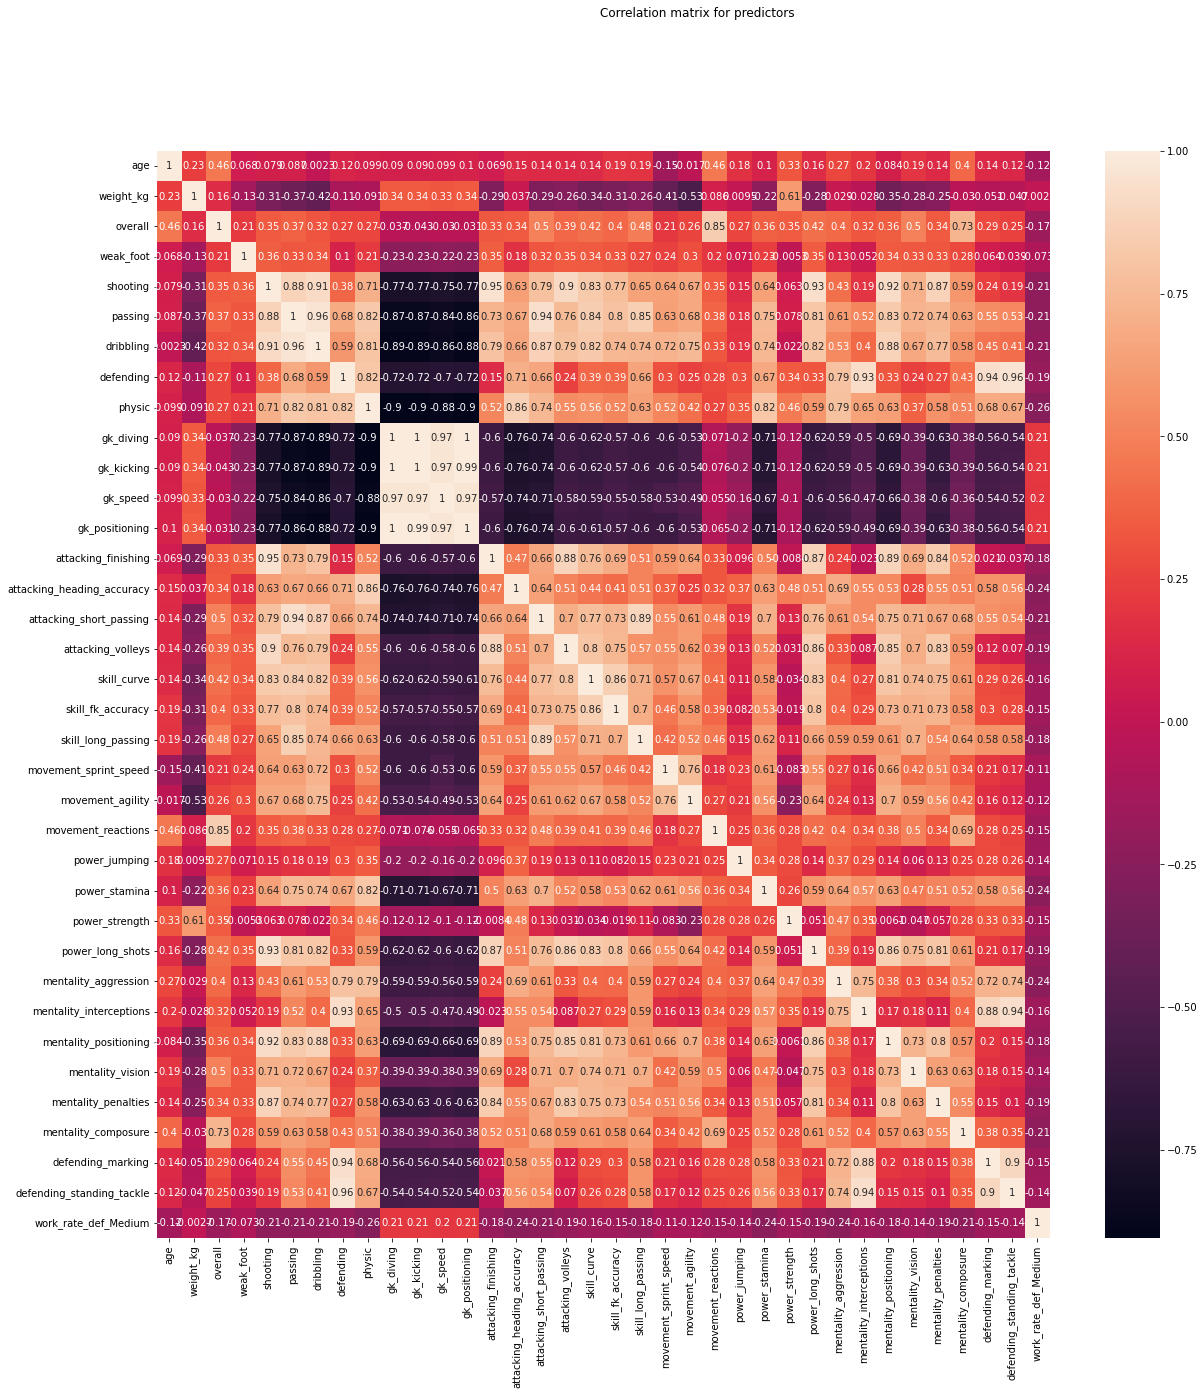

In [69]:
#plotting correlation matrix among predictors
corrMatrix = df[df.columns].corr() 
fig, ax = plt.subplots(figsize=(20,20)) 
ax=sns.heatmap(corrMatrix, annot=True) 
fig.suptitle("Correlation matrix for predictors")
plt.show()

In [70]:
#Dropping features which have correlation value greater than 0.90
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(len(to_drop))
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

13


/tmp/ipykernel_127/1689474654.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [71]:
#printing the final set of columns and their count
print(df.columns,len(df.columns))

Index(['age', 'weight_kg', 'overall', 'weak_foot', 'shooting', 'passing',
       'defending', 'physic', 'player_traits', 'attacking_heading_accuracy',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'power_jumping', 'power_stamina', 'power_strength',
       'mentality_aggression', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'work_rate_def_Medium'],
      dtype='object') 24


**Observations in this section**

when we have highly correlated features, the variance of weights will be large, which in turn indicates that the model is very sensitive to data. It means that the model might not perform well with test data. When we remove high correlated columns(threshold > 90%), the dataset is finally left with 24 columns.

## **Implementing Linear Regression**

In [72]:
# Get all the columns except 'overall' as the predictors
X = df.drop(['overall'],axis=1)

# Select 'overall' as the response variable
y = df['overall']

# Split the data into train and validation sets
# Set the train size to 0.8 and random state to 22
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8,random_state=22)

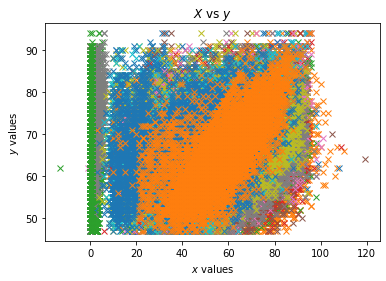

In [73]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(X,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$X$ vs $y$')
plt.show()

In [74]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(X_train,y_train)

# Get the predictions on the validation data using the trained model
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Compute the MSE for the train and validation data
train_mse = mean_squared_error(y_pred_train, y_train)
val_mse = mean_squared_error(y_pred_val, y_val)

#print the mse
print(f"The training mse is: {train_mse}")
print(f"The validation mse is: {val_mse}")

The training mse is: 8.58205178780429
The validation mse is: 8.659174722155175


In [75]:
#computing r2_score 
train_score= r2_score(y_train, y_pred_train)
val_score = r2_score(y_val,y_pred_val)
#print the scores
print(f"The training r2_score is: {train_score:2f}")
print(f"The validation r2_score is: {val_score:2f}")

The training r2_score is: 0.824624
The validation r2_score is: 0.826789


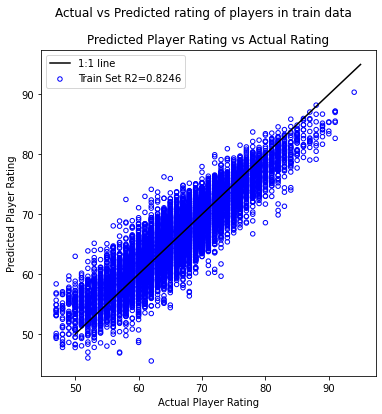

In [76]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(y_train, y_pred_train, s=20, marker='o', c='None', edgecolors='blue', label=f'Train Set R2={train_score.round(4)}')
ax.set_xlabel("Actual Player Rating")
ax.set_ylabel("Predicted Player Rating")
ax.set_title("Predicted Player Rating vs Actual Rating")
ax.plot([50,95], [50,95], c='k', label="1:1 line")
fig.suptitle("Actual vs Predicted rating of players in train data")
ax.legend()

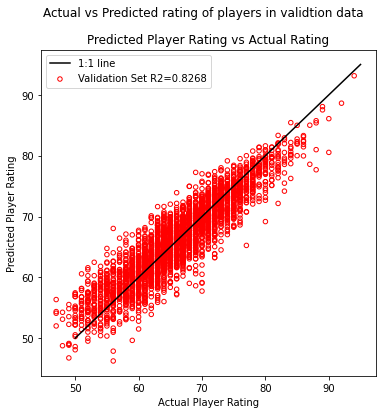

In [77]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(y_val, y_pred_val, s=20, marker='o', c='None', edgecolors='red', label=f'Validation Set R2={val_score.round(4)}')
ax.set_xlabel("Actual Player Rating")
ax.set_ylabel("Predicted Player Rating")
ax.set_title("Predicted Player Rating vs Actual Rating")
ax.plot([50,95], [50,95], c='k', label="1:1 line")
fig.suptitle("Actual vs Predicted rating of players in validtion data")
ax.legend()

**Observations in this section**

Linear Regression model has performed well in this data.
The training and validation mse is around 8 and r2_scores are around 82

## **Preprocessing players_20 dataset using same techniques as players_19 dataset**

In [78]:
#reading the 2020 players dataset
df1=pd.read_csv("https://raw.githubusercontent.com/rraj29/data/main/players_20.csv")
df1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [79]:
df1.shape

(18278, 104)

In [80]:
na = pd.notnull(df1["team_position"])
df1 = df1[na]

In [81]:
df1.shape

(18038, 104)

In [82]:
#Remove the last 31 columns 
df1 = df1.iloc[: , :-31]

# Remove the columns suggested in the project description
df1.drop(["sofifa_id", "player_url", "short_name","long_name", "real_face", "potential"],axis=1,inplace=True)

# Remove the columns that should not make a difference
df1.drop(["dob", "nationality", "player_positions", "body_type", "loaned_from", "joined", "contract_valid_until"],axis=1,inplace=True)

# Removing the columns for team_jersey_number and nation_jersey_number. These should not make a difference
df1.drop(["player_tags", "team_jersey_number", "nation_jersey_number"],axis=1,inplace=True)

na = pd.notnull(df1["team_position"])
df1 = df1[na]

for i in df1.columns[14:26]:
    print("filling missing values in :"+i)
    df1[i]=df1[i].fillna(0)

df1["release_clause_eur"].fillna(0.0, inplace=True)

for i in df1.columns[28:]:
    print("evaluating values in column :"+i)
    df1[i]=df1[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df1["preferred_foot"] = df1["preferred_foot"].map({"Left":0, 'Right':1})

df1["nation_position"]= df1["nation_position"].apply(lambda x:0 if x == np.nan else 1)

df1["team_position"].replace('RES', 'GK', inplace=True)
df1["team_position"].replace('SUB', 'GK', inplace=True)
df1_encoded_team=pd.get_dummies(df1["team_position"],prefix="team",drop_first=False)
df1=pd.concat([df1,df1_encoded_team],axis=1)
df1.drop(["team_position"],axis=1,inplace=True)

df1["work_rate_att"]=df1["work_rate"].apply(lambda x: x.split("/")[0])
df1["work_rate_def"]=df1["work_rate"].apply(lambda x: x.split("/")[1])
df1_att=pd.get_dummies(df1["work_rate_att"],prefix="work_rate_att",drop_first=False)
df1_def=pd.get_dummies(df1["work_rate_def"],prefix="work_rate_def",drop_first=False)
df1=pd.concat([df1,df1_att,df1_def],axis=1)
df1.drop(["work_rate", "work_rate_att", "work_rate_def"],axis=1,inplace=True)

df1["player_traits"].fillna('', inplace=True)
for i in range(df1.shape[0]):
    a=df1["player_traits"].iloc[i]
    b=len(a.split(','))
    if a=='':
        b=0
    df1["player_traits"].iloc[i]=b

filling missing values in :nation_position
filling missing values in :pace
filling missing values in :shooting
filling missing values in :passing
filling missing values in :dribbling
filling missing values in :defending
filling missing values in :physic
filling missing values in :gk_diving
filling missing values in :gk_handling
filling missing values in :gk_kicking
filling missing values in :gk_reflexes
filling missing values in :gk_speed
evaluating values in column :attacking_crossing
evaluating values in column :attacking_finishing
evaluating values in column :attacking_heading_accuracy
evaluating values in column :attacking_short_passing
evaluating values in column :attacking_volleys
evaluating values in column :skill_dribbling
evaluating values in column :skill_curve
evaluating values in column :skill_fk_accuracy
evaluating values in column :skill_long_passing
evaluating values in column :skill_ball_control
evaluating values in column :movement_acceleration
evaluating values in col

/usr/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
df1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18038 entries, 0 to 18277
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18038 non-null  int64  
 1   height_cm                   18038 non-null  int64  
 2   weight_kg                   18038 non-null  int64  
 3   club                        18038 non-null  object 
 4   overall                     18038 non-null  int64  
 5   value_eur                   18038 non-null  int64  
 6   wage_eur                    18038 non-null  int64  
 7   preferred_foot              18038 non-null  int64  
 8   international_reputation    18038 non-null  int64  
 9   weak_foot                   18038 non-null  int64  
 10  skill_moves                 18038 non-null  int64  
 11  release_clause_eur          18038 non-null  float64
 12  nation_position             18038 non-null  int64  
 13  pace                        180

In [84]:
df1.shape

(18038, 88)

In [85]:
for i in df1.columns[:-1]:
        if i != "club":
                print('converting '+i)
                df1[i] = df1[i].apply(pd.to_numeric)

converting age
converting height_cm
converting weight_kg
converting overall
converting value_eur
converting wage_eur
converting preferred_foot
converting international_reputation
converting weak_foot
converting skill_moves
converting release_clause_eur
converting nation_position
converting pace
converting shooting
converting passing
converting dribbling
converting defending
converting physic
converting gk_diving
converting gk_handling
converting gk_kicking
converting gk_reflexes
converting gk_speed
converting gk_positioning
converting player_traits
converting attacking_crossing
converting attacking_finishing
converting attacking_heading_accuracy
converting attacking_short_passing
converting attacking_volleys
converting skill_dribbling
converting skill_curve
converting skill_fk_accuracy
converting skill_long_passing
converting skill_ball_control
converting movement_acceleration
converting movement_sprint_speed
converting movement_agility
converting movement_reactions
converting movement

In [86]:
#removing columns that are dropped from 2019 dataset
col20_list=list(df.columns)
#Appending club column as it is needed to filter the test data
col20_list.append("club")
#col20_list

In [87]:
df1.shape

(18038, 88)

In [88]:
df1=df1[col20_list]
df1.shape

(18038, 25)

In [89]:
df1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18038 entries, 0 to 18277
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18038 non-null  int64  
 1   weight_kg                   18038 non-null  int64  
 2   overall                     18038 non-null  int64  
 3   weak_foot                   18038 non-null  int64  
 4   shooting                    18038 non-null  float64
 5   passing                     18038 non-null  float64
 6   defending                   18038 non-null  float64
 7   physic                      18038 non-null  float64
 8   player_traits               18038 non-null  int64  
 9   attacking_heading_accuracy  18038 non-null  int64  
 10  skill_curve                 18038 non-null  int64  
 11  skill_fk_accuracy           18038 non-null  int64  
 12  skill_long_passing          18038 non-null  int64  
 13  movement_sprint_speed       180

**Observations in this section**

Deleting all the columns that are dropped from players_19 dataset after implementing similar preprocessing techniques. clubs column is not dropped here as that is needed later to filter rows in making test dataset. Dataset is finally left with around 20 columns (including club column) 

## **Preparing the test dataset**

In [90]:
#filtering rows belonging to required clubs
club_list=["FC Barcelona","FC Bayern München","Real Madrid","Paris Saint-Germain","Juventus","Manchester City","Liverpool FC"]
df1_test=df1[df1["club"].isin(club_list)]
df1_test.head()

,age,weight_kg,overall,weak_foot,shooting,passing,defending,physic,player_traits,attacking_heading_accuracy,...,movement_reactions,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,work_rate_def_Medium,club
0,32,72,94,4,92.0,92.0,39.0,66.0,8,70,...,95,68,75,68,48,94,75,96,0,FC Barcelona
1,34,83,93,4,93.0,82.0,35.0,78.0,6,89,...,96,95,85,78,63,82,85,95,0,Juventus
2,27,68,92,5,85.0,87.0,32.0,58.0,6,62,...,92,61,81,49,51,90,90,94,1,Paris Saint-Germain
4,28,74,91,4,83.0,86.0,35.0,66.0,5,61,...,90,56,84,63,54,89,88,91,1,Real Madrid
5,28,70,91,5,86.0,92.0,61.0,78.0,6,55,...,91,63,89,74,76,94,79,91,0,Manchester City


In [91]:
df1_test.shape

(188, 25)

**Observations in this section**

After filtering out the rows, test data is left with 188 rows and 19 columns, among which clubs will be removed in the next step.

## **Predicting and computing the results**

In [92]:
#Splitting the test data to X and y
X_20=df1_test.drop(["overall","club"],axis=1)
y_20=df1_test["overall"]

In [93]:
#Predicting on the test data using the model
y_20_pred=model.predict(X_20)

In [94]:
#computing the mse
test_mse = mean_squared_error(y_20_pred, y_20)
print(f"The prediction mse is: {test_mse}")

The prediction mse is: 10.348733173961579


In [95]:
#computing the r2_score on test data
test_score= r2_score(y_20, y_20_pred)
#print the scores
print(f"The r2_score for test data is: {test_score:2f}")

The r2_score for test data is: 0.873994


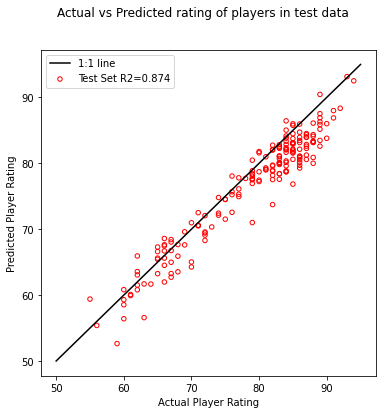

In [96]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(y_20, y_20_pred, s=20, marker='o', c='None', edgecolors='red', label=f'Test Set R2={test_score.round(4)}')
ax.set_xlabel("Actual Player Rating")
ax.set_ylabel("Predicted Player Rating")
ax.plot([50,95], [50,95], c='k', label="1:1 line")
fig.suptitle("Actual vs Predicted rating of players in test data")
ax.legend()

**Observations in this section**

The mse for test set is around 10 and r2_score was around 0.87

## **The best player**

In [97]:
#checking the predcited values
max_overall_value=max(y_20_pred)
best_player_index=np.where(y_20_pred == max_overall_value)
print(f'The best player has an overall score of {max(y_20_pred)} at an index of {best_player_index[0][0]}')

The best player has an overall score of 93.15419668370663 at an index of 1


In [98]:
#checking the details of the top ranked players
best_player_row=X_20[:][best_player_index[0][0]:best_player_index[0][0]+1]

In [99]:
best_player_row

,age,weight_kg,weak_foot,shooting,passing,defending,physic,player_traits,attacking_heading_accuracy,skill_curve,...,movement_agility,movement_reactions,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,work_rate_def_Medium
1,34,83,4,93.0,82.0,35.0,78.0,6,89,81,...,87,96,95,85,78,63,82,85,95,0


In [100]:
best_player_age=best_player_row["age"]
best_player_weight=best_player_row["weight_kg"]
best_player_passing=best_player_row["passing"]

In [101]:
#finding out the best player
df_ans=pd.read_csv("https://raw.githubusercontent.com/rraj29/data/main/players_20.csv")
best_player=df_ans[(df_ans["age"]==best_player_age[1])&(df_ans["weight_kg"]==best_player_weight[1])&(df_ans["passing"]==best_player_passing[1])]

In [102]:
best_player

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [103]:
print("The best player is "+ best_player["short_name"])

1    The best player is Cristiano Ronaldo
Name: short_name, dtype: object


**Observations in this section**

* The best player is Ronaldo with an overall score of around 93



Please note that all the results mentioned in the text fields are having a buffer of +2 to +2. It keeps varying a little everytime we run the cells. 